## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on= "Mouse ID")
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = len(merged_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids_df = merged_data[merged_data.duplicated(['Mouse ID'])]
duplicate_ids_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22
12,g107,5,48.791665,0,Ketapril,Female,2,29


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data[merged_data["Mouse ID"]!="g989"]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
std = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Standard Deviation": std,
    "Tumor Volume SEM": sem}
)
summary_stats_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_py = clean_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"])
summary_stat_py

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

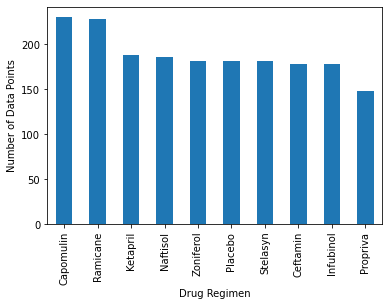

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

clean_data_df["Drug Regimen"].value_counts().plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Naftisol'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Zoniferol'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Ceftamin')]

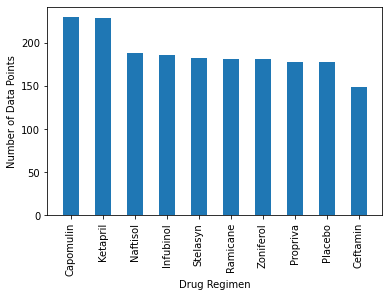

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_series = clean_data_df["Drug Regimen"].value_counts()
drugs = clean_data_df["Drug Regimen"].unique()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.bar(drugs, drug_series,width=0.5)

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Data Points")
ax.set_xticklabels(drugs,rotation=90)


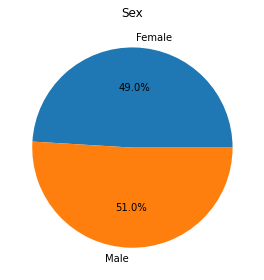

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_vs_female = clean_data_df.groupby("Sex")
male_vs_female_count = male_vs_female['Mouse ID'].count()
gender_pie = male_vs_female_count.plot(kind="pie", autopct="%1.1f%%", y=male_vs_female, title=("Sex"))
gender_pie.set_ylabel("")
plt.tight_layout()
plt.show()

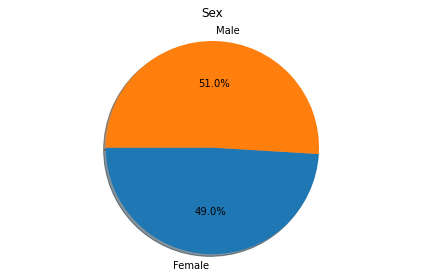

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = clean_data_df.groupby("Sex")

# Find how many of each 'sex' exists
male_vs_female_count = male_vs_female['Mouse ID'].count()

# Set labels, equal axis, pie chart specifications and title.
labels = ["Female", "Male"]

plt.axis("equal")

plt.pie(male_vs_female_count, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Sex")

# Set tight layout and display pie chart.
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# add subset 
# Determine outliers using upper and lower bounds
#capomulin_data = tumor_last_vol_reset
by_mouse = merged_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(merged_data,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


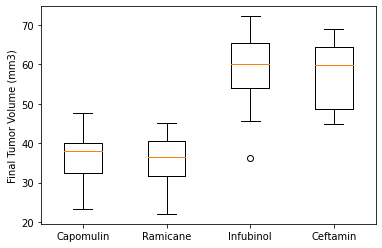

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

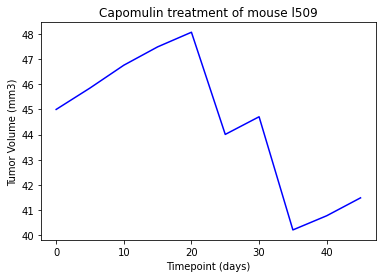

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_tumor_volume = clean_data_df.loc[lambda clean_data_df: clean_data_df["Mouse ID"]=="l509"]
timepoint = l509_tumor_volume["Timepoint"]
plt.plot(timepoint, l509_tumor_volume['Tumor Volume (mm3)'], color="blue")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the line plot
plt.show()

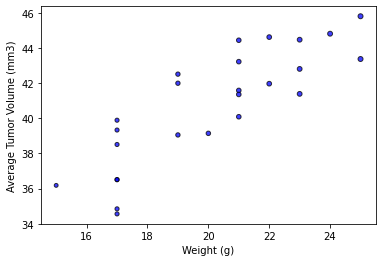

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_data_df.loc[lambda clean_data_df: clean_data_df["Drug Regimen"]=="Capomulin"]
avg_tumor_volume = capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
weight = capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]
plt.scatter(weight, avg_tumor_volume, marker="o", facecolors="blue", edgecolors="black",
            s=weight, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_scat = pd.merge(avg_tumor_volume, weight, how='left', on= "Mouse ID")
weight = capo_scat.iloc[:,0]
tvol = capo_scat.iloc[:,1]

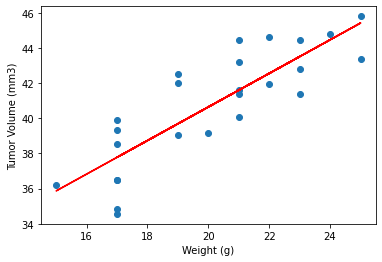

In [18]:
#Plot linear regression model for mouse weight and average tumor volume for Capomulin regimen
x_values = capo_scat["Weight (g)"]
y_values = capo_scat["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()